In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Saving and loading models

 ## Coding tutorials
 #### [1. Saving and loading model weights](#coding_tutorial_1)
 #### [2. Model saving criteria](#coding_tutorial_2)
 #### [3. Saving the entire model](#coding_tutorial_3)
 #### [4. Loading pre-trained Keras models](#coding_tutorial_4)
 #### [5. Tensorflow Hub modules](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Saving and loading model weights

#### Load and inspect CIFAR-10 dataset

The CIFAR-10 dataset consists of, in total, 60000 color images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download, see [this link](https://www.cs.toronto.edu/~kriz/cifar.html).

In [2]:
# Import the CIFAR-10 dataset and rescale the pixel values

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Use smaller subset -- speeds things up
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

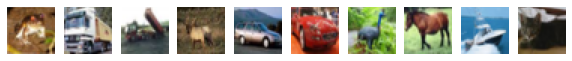

In [6]:
# Plot the first 10 CIFAR-10 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

#### Introduce two useful functions

In [7]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [8]:
# Introduce function that creates a new instance of a simple CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def get_new_model():
    model = Sequential([
        Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3), 
               activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

#### Create simple convolutional neural network classifier

In [9]:
# Create an instance of the model and show model summary
model = get_new_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 8)         1160      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
____________________________________________________

In [10]:
# Test accuracy of the untrained model, around 10% (random)
model.fit(x_train, y_train,epochs = 30, validation_split=0.1, batch_size = 1000)

Train on 9000 samples, validate on 1000 samples
Epoch 1/30
9000/9000 [==============================] - 2s 243us/sample - loss: 2.3034 - accuracy: 0.0989 - val_loss: 2.2928 - val_accuracy: 0.1180
Epoch 2/30
9000/9000 [==============================] - 2s 173us/sample - loss: 2.2772 - accuracy: 0.1382 - val_loss: 2.2578 - val_accuracy: 0.1580
Epoch 3/30
9000/9000 [==============================] - 2s 171us/sample - loss: 2.2284 - accuracy: 0.1944 - val_loss: 2.1908 - val_accuracy: 0.2010
Epoch 4/30
9000/9000 [==============================] - 2s 174us/sample - loss: 2.1467 - accuracy: 0.2444 - val_loss: 2.1043 - val_accuracy: 0.2560
Epoch 5/30
9000/9000 [==============================] - 2s 171us/sample - loss: 2.0581 - accuracy: 0.2720 - val_loss: 2.0217 - val_accuracy: 0.2830
Epoch 6/30
9000/9000 [==============================] - 2s 175us/sample - loss: 1.9865 - accuracy: 0.2992 - val_loss: 1.9550 - val_accuracy: 0.3170
Epoch 7/30
9000/9000 [==============================] - 2s 173us

#### Train model with checkpoints

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [12]:
# Create Tensorflow checkpoint object
model_check_point = ModelCheckpoint(filepath="./model_check_point", save_weights_only= True, frequency = "epoch", verbose = 1)

In [13]:
# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch
model.fit(x_train, y_train,epochs = 30, validation_split=0.1, batch_size = 100, callbacks= [model_check_point])

Train on 9000 samples, validate on 1000 samples
Epoch 1/30
8800/9000 [============================>.] - ETA: 0s - loss: 1.4884 - accuracy: 0.4617
Epoch 00001: saving model to ./model_check_point
9000/9000 [==============================] - 2s 236us/sample - loss: 1.4876 - accuracy: 0.4619 - val_loss: 1.5634 - val_accuracy: 0.4280
Epoch 2/30
8800/9000 [============================>.] - ETA: 0s - loss: 1.4199 - accuracy: 0.4893
Epoch 00002: saving model to ./model_check_point
9000/9000 [==============================] - 2s 206us/sample - loss: 1.4195 - accuracy: 0.4899 - val_loss: 1.4649 - val_accuracy: 0.4630
Epoch 3/30
8800/9000 [============================>.] - ETA: 0s - loss: 1.3898 - accuracy: 0.5017
Epoch 00003: saving model to ./model_check_point
9000/9000 [==============================] - 2s 206us/sample - loss: 1.3890 - accuracy: 0.5020 - val_loss: 1.4484 - val_accuracy: 0.4750
Epoch 4/30
8800/9000 [============================>.] - ETA: 0s - loss: 1.3725 - accuracy: 0.5076
Ep

Epoch 30/30
8800/9000 [============================>.] - ETA: 0s - loss: 1.0358 - accuracy: 0.6347
Epoch 00030: saving model to ./model_check_point
9000/9000 [==============================] - 2s 201us/sample - loss: 1.0361 - accuracy: 0.6348 - val_loss: 1.2820 - val_accuracy: 0.5470


In [ ]:
# Have a look at what the checkpoint creates
!ls -lh


In [49]:
# Evaluate the performance of the trained model
get_test_accuracy(model, x_test, y_test)

accuracy: 0.532


#### Create new model, load weights

In [30]:
# Create a new instance of the (initialised) model, accuracy around 10% again
model = get_new_model()
print(get_test_accuracy(model, x_test, y_test))

accuracy: 0.103
None


In [31]:
# Load weights -- accuracy is the same as the trained model
model.load_weights("./model_check_point")
print(get_test_accuracy(model, x_test, y_test))

accuracy: 0.514
None


#### Clear directory

In [39]:
! rm model_check_point*

rm: cannot remove 'model_check_point*': No such file or directory


***
<a id="coding_tutorial_2"></a>
## Model saving criteria

#### Create more customised checkpoint

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
# Create Tensorflow checkpoint object with epoch and batch details
checkpoint_500_path = "model_checkpoints_5000/checkpoint_{epoch:02d}"
checkpoint_5000 = ModelCheckpoint(filepath=checkpoint_500_path, 
                                  save_freq= 5000,
                                  verbose = 1,
                                  save_weights_only=True
                                 )

In [19]:
# Create and fit model with checkpoint
model = get_new_model()
model.fit(x=x_train, y=y_train, 
          callbacks=[checkpoint_5000],
          batch_size = 10,
          epochs = 3)

Train on 10000 samples
Epoch 1/3
 4970/10000 [=============>................] - ETA: 2s - loss: 2.0977 - accuracy: 0.2179
Epoch 00001: saving model to model_checkpoints_5000/checkpoint_01
 9940/10000 [============================>.] - ETA: 0s - loss: 1.9270 - accuracy: 0.2898
Epoch 00001: saving model to model_checkpoints_5000/checkpoint_01
10000/10000 [==============================] - 5s 507us/sample - loss: 1.9265 - accuracy: 0.2901
Epoch 2/3
 4940/10000 [=============>................] - ETA: 2s - loss: 1.5950 - accuracy: 0.4180
Epoch 00002: saving model to model_checkpoints_5000/checkpoint_02
 9970/10000 [============================>.] - ETA: 0s - loss: 1.5789 - accuracy: 0.4250
Epoch 00002: saving model to model_checkpoints_5000/checkpoint_02
10000/10000 [==============================] - 5s 471us/sample - loss: 1.5790 - accuracy: 0.4250
Epoch 3/3
 4920/10000 [=============>................] - ETA: 2s - loss: 1.4823 - accuracy: 0.4602
Epoch 00003: saving model to model_checkpoin

In [20]:
# Have a look at what the checkpoint creates
!ls ./model_checkpoints_5000

checkpoint			   checkpoint_02.index
checkpoint_01.data-00000-of-00001  checkpoint_03.data-00000-of-00001
checkpoint_01.index		   checkpoint_03.index
checkpoint_02.data-00000-of-00001


#### Work with model saving criteria

In [49]:
# Use tiny training and test set -- will overfit!

x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]

In [50]:
# Create a new instance of untrained model
model = get_new_model()


In [51]:
# Create Tensorflow checkpoint object which monitors the validation accuracy

check_best_path = "model_checkpoints_best/checkpoint"
checkpoint_best = ModelCheckpoint(filepath = check_best_path,
                                save_best_only=True,
                                  save_freq = "epoch",
                                  monitor = "val_accuracy",
                                  verbose = 1,
                                  save_weights_only = True
                                 )


In [52]:
# Fit the model and save only the weights with the highest validation accuracy
history = model.fit(x = x_train, 
                    y = y_train, 
                    epochs = 500, 
                    validation_data = (x_test, y_test), 
                    batch_size = 10, 
                    callbacks = [checkpoint_best],
                    verbose = 0
                   )



Epoch 00001: val_accuracy improved from -inf to 0.06000, saving model to model_checkpoints_best/checkpoint

Epoch 00002: val_accuracy did not improve from 0.06000

Epoch 00003: val_accuracy did not improve from 0.06000

Epoch 00004: val_accuracy did not improve from 0.06000

Epoch 00005: val_accuracy did not improve from 0.06000

Epoch 00006: val_accuracy improved from 0.06000 to 0.09000, saving model to model_checkpoints_best/checkpoint

Epoch 00007: val_accuracy did not improve from 0.09000

Epoch 00008: val_accuracy improved from 0.09000 to 0.14000, saving model to model_checkpoints_best/checkpoint

Epoch 00009: val_accuracy did not improve from 0.14000

Epoch 00010: val_accuracy improved from 0.14000 to 0.16000, saving model to model_checkpoints_best/checkpoint

Epoch 00011: val_accuracy did not improve from 0.16000

Epoch 00012: val_accuracy did not improve from 0.16000

Epoch 00013: val_accuracy did not improve from 0.16000

Epoch 00014: val_accuracy did not improve from 0.16000


Epoch 00142: val_accuracy did not improve from 0.25000

Epoch 00143: val_accuracy did not improve from 0.25000

Epoch 00144: val_accuracy did not improve from 0.25000

Epoch 00145: val_accuracy did not improve from 0.25000

Epoch 00146: val_accuracy did not improve from 0.25000

Epoch 00147: val_accuracy did not improve from 0.25000

Epoch 00148: val_accuracy did not improve from 0.25000

Epoch 00149: val_accuracy did not improve from 0.25000

Epoch 00150: val_accuracy did not improve from 0.25000

Epoch 00151: val_accuracy did not improve from 0.25000

Epoch 00152: val_accuracy did not improve from 0.25000

Epoch 00153: val_accuracy did not improve from 0.25000

Epoch 00154: val_accuracy did not improve from 0.25000

Epoch 00155: val_accuracy did not improve from 0.25000

Epoch 00156: val_accuracy did not improve from 0.25000

Epoch 00157: val_accuracy did not improve from 0.25000

Epoch 00158: val_accuracy did not improve from 0.25000

Epoch 00159: val_accuracy did not improve from 


Epoch 00289: val_accuracy did not improve from 0.25000

Epoch 00290: val_accuracy did not improve from 0.25000

Epoch 00291: val_accuracy did not improve from 0.25000

Epoch 00292: val_accuracy did not improve from 0.25000

Epoch 00293: val_accuracy did not improve from 0.25000

Epoch 00294: val_accuracy did not improve from 0.25000

Epoch 00295: val_accuracy did not improve from 0.25000

Epoch 00296: val_accuracy did not improve from 0.25000

Epoch 00297: val_accuracy did not improve from 0.25000

Epoch 00298: val_accuracy did not improve from 0.25000

Epoch 00299: val_accuracy did not improve from 0.25000

Epoch 00300: val_accuracy did not improve from 0.25000

Epoch 00301: val_accuracy did not improve from 0.25000

Epoch 00302: val_accuracy did not improve from 0.25000

Epoch 00303: val_accuracy did not improve from 0.25000

Epoch 00304: val_accuracy did not improve from 0.25000

Epoch 00305: val_accuracy did not improve from 0.25000

Epoch 00306: val_accuracy did not improve from 


Epoch 00436: val_accuracy did not improve from 0.25000

Epoch 00437: val_accuracy did not improve from 0.25000

Epoch 00438: val_accuracy did not improve from 0.25000

Epoch 00439: val_accuracy did not improve from 0.25000

Epoch 00440: val_accuracy did not improve from 0.25000

Epoch 00441: val_accuracy did not improve from 0.25000

Epoch 00442: val_accuracy did not improve from 0.25000

Epoch 00443: val_accuracy did not improve from 0.25000

Epoch 00444: val_accuracy did not improve from 0.25000

Epoch 00445: val_accuracy did not improve from 0.25000

Epoch 00446: val_accuracy did not improve from 0.25000

Epoch 00447: val_accuracy did not improve from 0.25000

Epoch 00448: val_accuracy did not improve from 0.25000

Epoch 00449: val_accuracy did not improve from 0.25000

Epoch 00450: val_accuracy did not improve from 0.25000

Epoch 00451: val_accuracy did not improve from 0.25000

Epoch 00452: val_accuracy did not improve from 0.25000

Epoch 00453: val_accuracy did not improve from 

<AxesSubplot:>

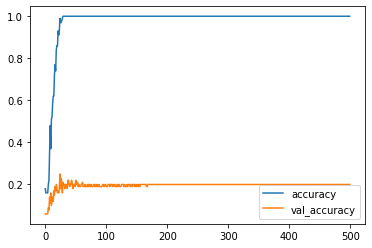

In [53]:
# Plot training and testing curves

import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [54]:
# Inspect the checkpoint directory
!ls model_checkpoints_best

checkpoint  checkpoint.data-00000-of-00001  checkpoint.index


In [55]:
# Create a new model with the saved weights
model = get_new_model()
get_test_accuracy(model,x_test,y_test)
model.load_weights("./model_checkpoints_best/checkpoint")
get_test_accuracy(model,x_test,y_test)

accuracy: 0.070
accuracy: 0.250


#### Clear directory

In [56]:
! rm -r model_checkpoints_5000 model_checkpoints_best

***
<a id="coding_tutorial_3"></a>
## Saving the entire model

#### Create checkpoint that saves whole model, not just weights

In [96]:
from tensorflow.keras.callbacks import ModelCheckpoint

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Use smaller subset -- speeds things up
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]


In [131]:
# Create Tensorflow checkpoint object
checkpoint_entire = ModelCheckpoint(
    filepath="./model_checkpoints",
    save_weights_only=False)

In [155]:
# Create and fit model with checkpoint
model = get_new_model()
model.fit(x = x_train, y = y_train, callbacks = [checkpoint_entire], epochs = 10)


Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 4s 354us/sample - loss: 2.0117 - accuracy: 0.2577
Epoch 2/10
10000/10000 [==============================] - 3s 318us/sample - loss: 1.6254 - accuracy: 0.4087
Epoch 3/10
10000/10000 [==============================] - 4s 393us/sample - loss: 1.4949 - accuracy: 0.4625
Epoch 4/10
10000/10000 [==============================] - 3s 321us/sample - loss: 1.4052 - accuracy: 0.4948
Epoch 5/10
10000/10000 [==============================] - 3s 317us/sample - loss: 1.3588 - accuracy: 0.5195
Epoch 6/10
10000/10000 [==============================] - 3s 310us/sample - loss: 1.3109 - accuracy: 0.5351
Epoch 7/10
10000/10000 [==============================] - 3s 311us/sample - loss: 1.2664 - accuracy: 0.5546
Epoch 8/10
10000/10000 [==============================] - 3s 315us/sample - loss: 1.2436 - accuracy: 0.5591
Epoch 9/10
10000/10000 [==============================] - 3s 310us/sample - loss: 1.2182 - accuracy: 0.5687
Epoch

#### Inspect what the checkpoint has created

In [156]:
# Have a look at what the checkpoint creates
!ls ./checkpoint_entire

assets	      checkpoint-10  checkpoint-4  checkpoint-7  saved_model.pb
checkpoint    checkpoint-2   checkpoint-5  checkpoint-8  variables
checkpoint-1  checkpoint-3   checkpoint-6  checkpoint-9


In [157]:
# Enter variables directory
!ls ./checkpoint_entire/variables/

variables.data-00000-of-00001  variables.index


In [158]:
# Get the model's test accuracy
get_test_accuracy(model, x_test, y_test)

accuracy: 0.521


#### Create new model from scratch

In [159]:
# Delete model
model = get_new_model()
get_test_accuracy(model, x_test, y_test)

accuracy: 0.099


In [160]:
from tensorflow.keras.models import load_model

In [161]:
# Reload model from scratch
model = load_model("./model_checkpoints")
get_test_accuracy(model, x_test, y_test)

accuracy: 0.521


#### Use the .h5 format to save model

In [162]:
# Save the model in .h5 format
model.save("my_model.h5")

In [163]:
# Inspect .h5 file
!ls -lh my_model.h5

-rw-rw-r-- 1 zhentao zhentao 77K Sep 20 02:46 my_model.h5


In [167]:
# Delete model
try:
    del model
    model
except Exception:
    raise ValueError("model is removed")

ValueError: model is removed

In [168]:
# Reload model from scratch
model = load_model("my_model.h5")
get_test_accuracy(model, x_test, y_test)

accuracy: 0.521


#### Clear directory

In [169]:
! rm -r model_checkpoints
! rm my_model.h5

***
<a id="coding_tutorial_4"></a>
## Loading pre-trained Keras models

#### Import and build Keras ResNet50 model

Today we'll be using the ResNet50 model designed by a team at Microsoft Research, available through Keras applications. Please see the description on the [Keras applications page](https://keras.io/applications/#resnet) for details. If you continue using it, please cite it properly! The paper it comes from is:

Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun. "Deep Residual Learning for Image Recognition", 2015.

This model takes a long time to download on the Coursera platform, so it is pre-downloaded in your workspace and saved in Keras HDF5 format. If you want to import it on your personal machine, use the following code:

```python
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')
```

In this coding tutorial, you will instead load the model directly from disk.

In [1]:
from tensorflow.keras.models import load_model

In [2]:
# Build Keras ResNet50 model
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

#### Import and preprocess 3 sample images

In [5]:
# Import 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img('data/lemon.jpg', target_size=(224, 224))
# viaduct_img = load_img('data/viaduct.jpg', target_size=(224, 224))
# water_tower_img = load_img('data/water_tower.jpg', target_size=(224, 224))

#### Use ResNet50 model to classify images

In [25]:
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

##### Image 1: lemon

In [26]:
# Display image

In [27]:
# Display top 5 predictions
get_top_5_predictions(lemon_img)

,prediction,probability
1,lemon,0.89884
2,orange,0.100569
3,banana,0.00030075
4,spaghetti_squash,6.77869e-05
5,jackfruit,3.30835e-05


##### Image 2: viaduct

In [ ]:
# Display image


In [ ]:
# Display top 5 predictions



##### Image 3: water tower

In [ ]:
# Display image



In [ ]:
# Display top 5 predictions



***
<a id="coding_tutorial_5"></a>
## Tensorflow Hub modules

#### Import and build Tensorflow Hub MobileNet v1 model

Today we'll be using Google's MobileNet v1 model, available on Tensorflow Hub. Please see the description on the [Tensorflow Hub page](https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4) for details on it's architecture, how it's trained, and the reference. If you continue using it, please cite it properly! The paper it comes from is:

Andrew G. Howard, Menglong Zhu, Bo Chen, Dmitry Kalenichenko, Weijun Wang, Tobias Weyand, Marco Andreetto, Hartwig Adam: "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications", 2017.

This model takes a long time to download on the Coursera platform, so it is pre-downloaded in your workspace and saved in Tensorflow SavedModel format. If you want to import it on your personal machine, use the following code:

```python
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
```

In this coding tutorial, you will instead load the model directly from disk.

In [39]:
import tensorflow_hub as hub
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential

In [40]:
# Build Google's Mobilenet v1 model
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   multiple                  1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


#### Use MobileNet model to classify images

In [69]:
# Import and preprocess 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img("data/lemon.jpg", target_size=(160, 160))
# viaduct_img = load_img("data/viaduct.jpg", target_size=(160, 160))
# water_tower_img = load_img("data/water_tower.jpg", target_size=(160, 160))

In [74]:
# Read in categories text file
categories=[]
with open('imagenet_categories.txt') as txt_file:
    categories = [i.split(" ")[2].strip() for i in txt_file.readlines()]

In [75]:
# Useful function: presents top 5 predictions

import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

##### Image 1: lemon

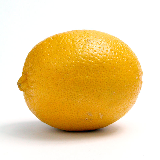

In [76]:
lemon_img

In [77]:
get_top_5_predictions(lemon_img)

,prediction
1,"'fig',"
2,"'lemon',"
3,"'crutch',"
4,"'jackfruit,"
5,'acorn


##### Image 2: viaduct

##### Image 3: water tower